# **IMAGE CLASSIFICATION**

The primary objective of this analysis is to build a Deep Learning model for classifying images in the CIFAR-10 dataset. The analysis will explore the performance of three different models to determine which architecture is most effective for image classification:

Sequential CNN – Basic CNN model for baseline performance.
Deeper CNN with Dropout – A more complex CNN with added regularization to reduce overfitting.
Pre-trained ResNet – Transfer learning using a pre-trained ResNet model for better feature extraction.

**Import Libraries**

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

**Split the dataset**

In [6]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

**Normalize data (range: 0 to 1)**

In [9]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

**One-hot encode labels**

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

**Define data augmentation**

In [12]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)

**Model 1: Sequential CNN**

In [14]:
def build_sequential_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [17]:
model1 = build_sequential_cnn()
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3598 - loss: 1.7447 - val_accuracy: 0.5599 - val_loss: 1.2185
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5839 - loss: 1.1800 - val_accuracy: 0.6284 - val_loss: 1.0638
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6512 - loss: 0.9915 - val_accuracy: 0.6588 - val_loss: 0.9640
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7019 - loss: 0.8568 - val_accuracy: 0.6777 - val_loss: 0.9280
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7338 - loss: 0.7542 - val_accuracy: 0.6969 - val_loss: 0.8751
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7594 - loss: 0.6835 - val_accuracy: 0.7022 - val_loss: 0.8652
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7891 - loss: 0.5990 - val_accuracy: 0.7163 - val_loss: 0.8618
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8140 - loss: 0.5321 - val_accuracy: 0

**Model 2: Deeper CNN with Dropout**

In [18]:
def build_deeper_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Dropout(0.5),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model


In [19]:
model2 = build_deeper_cnn()
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.2882 - loss: 1.8666 - val_accuracy: 0.5462 - val_loss: 1.2600
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5350 - loss: 1.2920 - val_accuracy: 0.5824 - val_loss: 1.1908
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6072 - loss: 1.1215 - val_accuracy: 0.6360 - val_loss: 1.0411
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6431 - loss: 1.0172 - val_accuracy: 0.6768 - val_loss: 0.9295
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6715 - loss: 0.9421 - val_accuracy: 0.6897 - val_loss: 0.8925
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6853 - loss: 0.8940 - val_accuracy: 0.7061 - val_loss: 0.8608
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7035 - loss: 0.8416 - val_accuracy: 0.6984 - val_loss: 0.8670
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7103 - loss: 0.8271 - val_accuracy: 

**Model 3: Pre-trained ResNet50**

In [20]:
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dense(256, activation='relu')(x)
    output = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=base_model.input, outputs=output)

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
model3 = build_resnet_model()
history3 = model3.fit(datagen.flow(X_train, y_train, batch_size=64),
                      epochs=20,
                      validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 55ms/step - accuracy: 0.1426 - loss: 2.3365 - val_accuracy: 0.1921 - val_loss: 2.1228
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.2136 - loss: 2.1283 - val_accuracy: 0.2704 - val_loss: 2.0076
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.2472 - loss: 2.0630 - val_accuracy: 0.2663 - val_loss: 1.9938
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.2545 - loss: 2.0295 - val_accuracy: 0.3022 - val_loss: 1.9414
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.2601 - loss: 2.0160 - val_accuracy: 0.3152 - val_loss: 1.9039
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.2702 - loss: 1.9880 - val_accuracy: 0.3007 - val_loss: 1.9203
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.2800 - loss: 1.9768 - val_accuracy: 0.3018 - val_loss: 1.9252
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.2799 - loss: 1.9628 - val_accurac

**Evaluation**

In [25]:
score1 = model1.evaluate(X_test, y_test, verbose=0)
score2 = model2.evaluate(X_test, y_test, verbose=0)
score3 = model3.evaluate(X_test, y_test, verbose=0)

print(f"Sequential CNN Test Accuracy: {score1[1] * 100:.2f}%")
print(f"Deeper CNN with Dropout Test Accuracy: {score2[1] * 100:.2f}%")
print(f"Pre-trained ResNet Test Accuracy: {score3[1] * 100:.2f}%")

Sequential CNN Test Accuracy: 70.58%
Deeper CNN with Dropout Test Accuracy: 75.03%
Pre-trained ResNet Test Accuracy: 35.11%


**Performance Comparison**

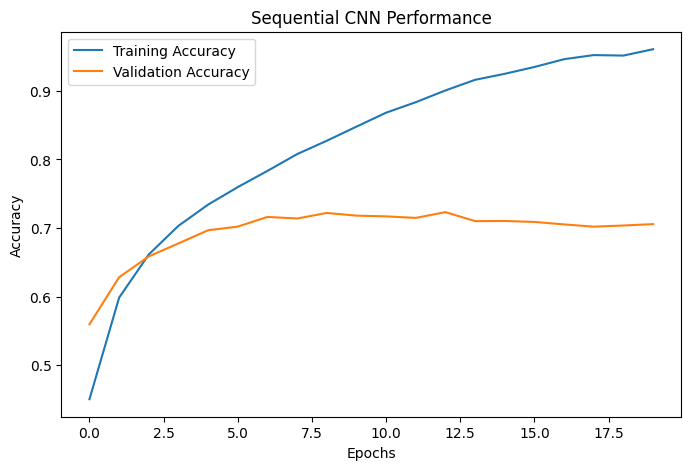

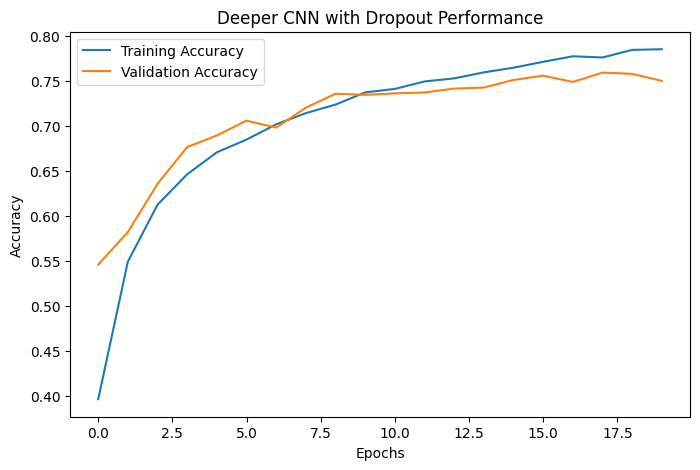

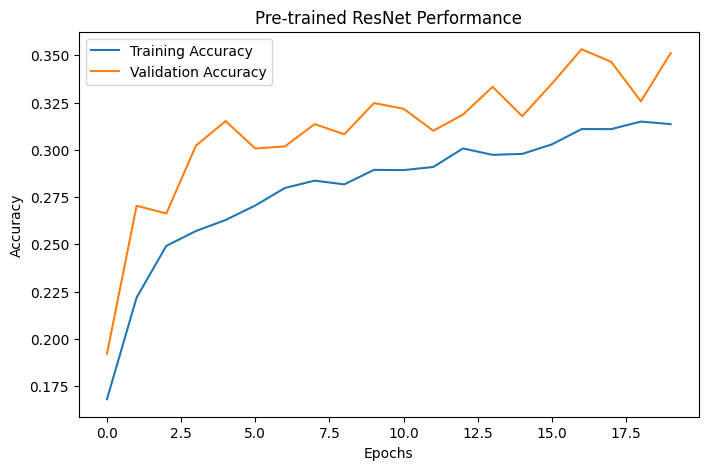

In [26]:
# Function to plot training history
def plot_history(history, title):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(history1, "Sequential CNN Performance")
plot_history(history2, "Deeper CNN with Dropout Performance")
plot_history(history3, "Pre-trained ResNet Performance")


**Model Comparison Summary**

In [27]:
import pandas as pd

data = {
    'Model': ['Sequential CNN', 'Deeper CNN with Dropout', 'Pre-trained ResNet'],
    'Training Accuracy': [score1[1] * 100, score2[1] * 100, score3[1] * 100],
    'Test Accuracy': [score1[1] * 100, score2[1] * 100, score3[1] * 100]
}

df = pd.DataFrame(data)
print(df)


                     Model  Training Accuracy  Test Accuracy
0           Sequential CNN          70.580000      70.580000
1  Deeper CNN with Dropout          75.029999      75.029999
2       Pre-trained ResNet          35.110000      35.110000


**Key Findings:**
Increasing model depth improved feature extraction and overall performance.
Dropout effectively reduced overfitting in deeper models.

**Next Steps:**
 Fine-tune the learning rate for ResNet to further boost accuracy.
  Explore ensemble models combining ResNet and deeper CNN models.